## Attribute Information

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

from pandas_profiling import ProfileReport

In [2]:
df = pd.read_csv("/content/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
## Extracting only Indian movoies and tv shows

indian_shows = df[df["country"] == "India"]
indian_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
39,s40,TV Show,Chhota Bheem,NaN,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"September 16, 2021",2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ..."
50,s51,TV Show,Dharmakshetra,NaN,"Kashmira Irani, Chandan Anand, Dinesh Mehta, A...",India,"September 15, 2021",2014,TV-PG,1 Season,"International TV Shows, TV Dramas, TV Sci-Fi &...","After the ancient Great War, the god Chitragup..."
66,s67,TV Show,Raja Rasoi Aur Anya Kahaniyan,NaN,NaN,India,"September 15, 2021",2014,TV-G,1 Season,"Docuseries, International TV Shows",Explore the history and flavors of regional In...


In [4]:
indian_shows.shape

(972, 12)

In [7]:
indian_shows.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,972.0,2011.966049,9.663647,1959.0,2010.0,2015.0,2018.0,2021.0


In [8]:
indian_shows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 972 entries, 4 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       972 non-null    object
 1   type          972 non-null    object
 2   title         972 non-null    object
 3   director      890 non-null    object
 4   cast          940 non-null    object
 5   country       972 non-null    object
 6   date_added    972 non-null    object
 7   release_year  972 non-null    int64 
 8   rating        972 non-null    object
 9   duration      972 non-null    object
 10  listed_in     972 non-null    object
 11  description   972 non-null    object
dtypes: int64(1), object(11)
memory usage: 98.7+ KB


In [9]:
indian_shows.isnull().sum()

show_id          0
type             0
title            0
director        82
cast            32
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

In [10]:
indian_shows.fillna("Data Not Available", inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [11]:
indian_shows.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [12]:
indian_shows.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8762,s8763,Movie,Wrong Side Raju,Mikhil Musale,"Pratik Gandhi, Kimberley Louisa McBeath, Asif ...",India,"October 1, 2017",2016,TV-MA,140 min,"Dramas, International Movies",The life of a chauffeur and part-time bootlegg...


In [ ]:
indian_shows["date_added"] = pd.to_datetime(indian_shows.date_added)
indian_shows["added_year"] = indian_shows["date_added"].dt.year
indian_shows["added_day"] = indian_shows["date_added"].dt.day_name()
indian_shows["added_month"] = indian_shows["date_added"].dt.month

In [14]:
indian_shows = indian_shows.drop(["date_added", "show_id"], axis=1)
indian_shows.head(1)

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,added_year,added_day,added_month
4,TV Show,Kota Factory,Data Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,Friday,9


In [15]:
indian_shows["rating"].value_counts()

TV-14       550
TV-MA       248
TV-PG       134
TV-Y7        14
TV-G          9
TV-Y          5
PG-13         4
NR            4
PG            2
R             1
TV-Y7-FV      1
Name: rating, dtype: int64

In [16]:
indian_shows.type.unique()

array(['TV Show', 'Movie'], dtype=object)

In [17]:
movies = indian_shows[indian_shows["type"] == "Movie"]
movies.head(1)

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,added_year,added_day,added_month
24,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021,Tuesday,9


In [18]:
tv_shows = indian_shows[indian_shows["type"] == "TV Show"]
tv_shows.head(1)

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,added_year,added_day,added_month
4,TV Show,Kota Factory,Data Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,Friday,9


In [ ]:
movies['duration'] = movies['duration'].str.split(' ').apply(lambda x: x[0])

# movies['duration']

In [ ]:
movies["duration"] = movies["duration"].astype("int")
# movies["duration"].dtype

In [ ]:
indian_shows["rating"].unique()

array(['TV-MA', 'TV-14', 'TV-Y7', 'TV-PG', 'TV-G', 'PG', 'PG-13', 'TV-Y',
       'R', 'NR', 'TV-Y7-FV'], dtype=object)

In [ ]:
movies.drop(movies[(movies["duration"] < 50) & (movies["cast"] == "Data Not Available")].index, inplace = True)

In [ ]:
rating_to_category = {
    'TV-PG': 'Kids',
    'G': 'Kids',
    'TV-Y': 'Kids',
    'TV-Y7-FV': 'Kids',
    'TV-Y7': 'Kids',
    'PG': 'Kids',
    'TV-G': 'Kids',
    
    'TV-14': 'Teens',
    'PG-13': 'Teens',
        
    'NR': 'Adults',
    'R': 'Adults',
    'TV-MA': 'Adults',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

movies["rating"] = movies["rating"].replace(rating_to_category)
tv_shows["rating"] = tv_shows["rating"].replace(rating_to_category)

In [ ]:
movies.loc[movies['duration'] <= 60, 'duration_type'] = 'short movie'
movies.loc[(movies['duration'] > 60) & (movies['duration'] <= 180) , 'duration_type'] = 'normal movie'
movies.loc[movies['duration'] > 180, 'duration_type'] = 'long movie'

tv_shows.loc[tv_shows["duration"] == '1 Season', "duration_type"] = '1 Season'
tv_shows.loc[tv_shows["duration"] == '2 Seasons', "duration_type"] = '2 Seasons'
tv_shows.loc[tv_shows["duration"] == '3 Seasons', "duration_type"] = '3 Seasons'


In [25]:
all_indian_shows = pd.concat([movies, tv_shows])
all_indian_shows = all_indian_shows.drop(["duration", "description"], axis=1)
all_indian_shows.head(2)

,type,title,director,cast,country,release_year,rating,listed_in,added_year,added_day,added_month,duration_type
24,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,1998,Teens,"Comedies, International Movies, Romantic Movies",2021,Tuesday,9,normal movie
105,Movie,Angamaly Diaries,Lijo Jose Pellissery,"Antony Varghese, Reshma Rajan, Binny Rinky Ben...",India,2017,Teens,"Action & Adventure, Comedies, Dramas",2021,Sunday,9,normal movie


In [26]:
all_indian_shows.loc[(all_indian_shows["listed_in"] !="Data Not Available")]["listed_in"].value_counts()

Comedies, Dramas, International Movies                 120
Dramas, International Movies                           118
Dramas, Independent Movies, International Movies       108
Dramas, International Movies, Romantic Movies           62
Action & Adventure, Dramas, International Movies        54
                                                      ... 
Comedies, Cult Movies, Dramas                            1
Action & Adventure, Classic Movies, Comedies             1
Dramas                                                   1
Independent Movies, International Movies, Thrillers      1
Action & Adventure, Classic Movies, Cult Movies          1
Name: listed_in, Length: 90, dtype: int64

In [28]:
genre_counts = pd.DataFrame(all_indian_shows.listed_in.str.split(',').tolist(), index=all_indian_shows.type).stack()
genre_counts = genre_counts.reset_index([0, 'type'])
genre_counts.columns = ['type', 'list']

genre_counts.loc[(genre_counts["list"] !="Data Not Available")]["list"].value_counts().drop(" Dramas")

 International Movies            776
Dramas                           384
Comedies                         262
 Independent Movies              149
Action & Adventure               127
 Romantic Movies                 118
 Thrillers                        88
 Music & Musicals                 88
International TV Shows            48
 Comedies                         46
International Movies              38
Horror Movies                     28
 TV Dramas                        27
 TV Comedies                      26
Children & Family Movies          18
 International TV Shows           17
Documentaries                     16
 Sports Movies                    14
 Romantic TV Shows                11
 Sci-Fi & Fantasy                 10
Kids' TV                          10
Classic Movies                     9
Crime TV Shows                     8
 TV Horror                         7
Docuseries                         7
Stand-Up Comedy                    6
 TV Action & Adventure             5
 

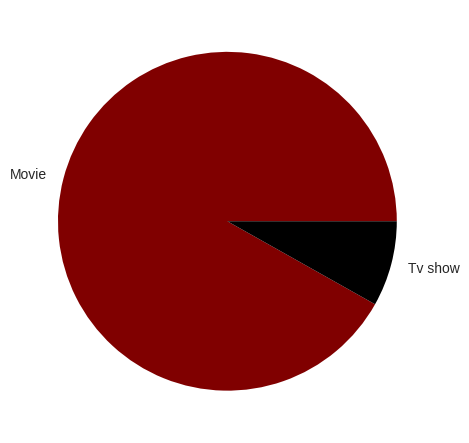

In [29]:
plt.pie(all_indian_shows["type"].value_counts(), labels=["Movie", "Tv show"], colors=["maroon","black"])
plt.show()

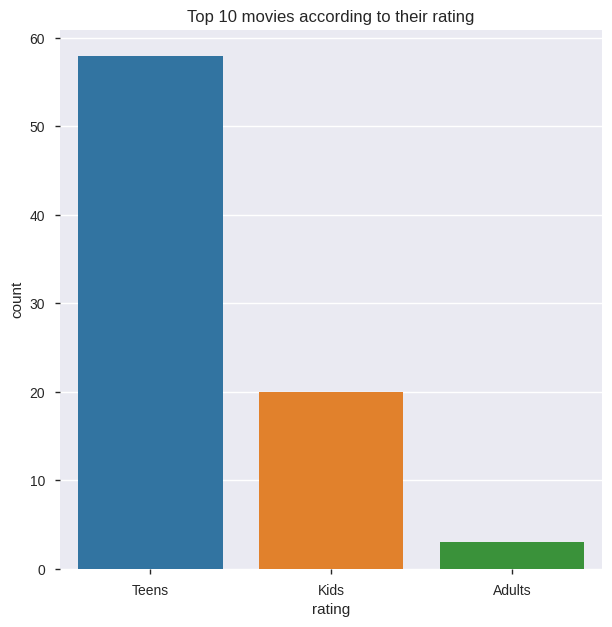

In [30]:
plt.figure(figsize=(7,7))
plt.title("Top 10 movies according to their rating")
movies_before_2000 = all_indian_shows[all_indian_shows["release_year"] < 2000]
sns.countplot(x="rating",data=movies_before_2000,order=movies_before_2000["rating"].value_counts().index[:10])
plt.show()

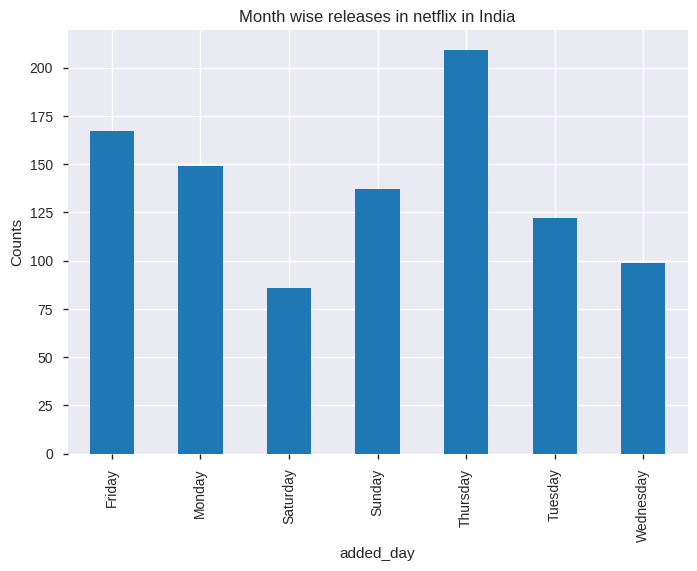

In [31]:
#Popular months with most netflix movies released

months_data = all_indian_shows[all_indian_shows['added_day'] != 'Data Not Available']
months_data =months_data.groupby('added_day')
months_data=months_data.size()
months_data.plot(kind="bar", y=["Type"])
plt.title('Month wise releases in netflix in India')
plt.ylabel('Counts')
plt.show()

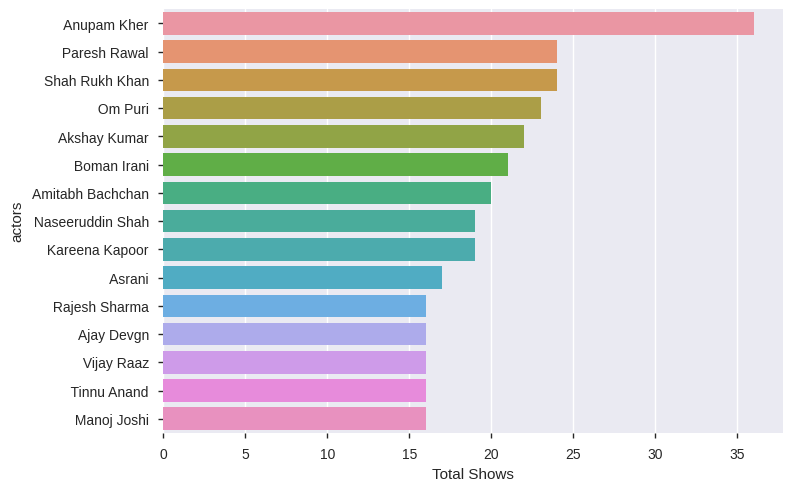

In [32]:
tmp=pd.DataFrame() 
tmp=all_indian_shows['cast'].str.split(',',expand=True).stack().to_frame() 
tmp.columns=['actors']

actor_info=tmp.groupby(['actors']).size().reset_index(name='Total Shows')
actor_info = actor_info[actor_info['actors'] != 'Data Not Available']
actor_info = actor_info.sort_values(by='Total Shows', ascending=False)[:15]
sns.barplot(y='actors', x='Total Shows', data=actor_info)
plt.show()

In [34]:
all_indian_shows.reset_index(drop=True, inplace=True)

In [35]:
all_indian_shows.head(3)

,type,title,director,cast,country,release_year,rating,listed_in,added_year,added_day,added_month,duration_type
0,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,1998,Teens,"Comedies, International Movies, Romantic Movies",2021,Tuesday,9,normal movie
1,Movie,Angamaly Diaries,Lijo Jose Pellissery,"Antony Varghese, Reshma Rajan, Binny Rinky Ben...",India,2017,Teens,"Action & Adventure, Comedies, Dramas",2021,Sunday,9,normal movie
2,Movie,Anjaam,Rahul Rawail,"Madhuri Dixit, Shah Rukh Khan, Tinnu Anand, Jo...",India,1994,Teens,"Dramas, International Movies, Thrillers",2021,Thursday,9,normal movie
